* import power spectrum
* create map
* create derivative maps

In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['font.size'] = 15

In [2]:
files = ['/global/u2/i/iameric/class/output/test_cl_lensed.dat']
data = []
for data_file in files:
    data = np.loadtxt(data_file)
#1:l     2:TT      3:EE       4:TE      5:BB   6:phiphi       7:TPhi      8:Ephi
names = ['l','TT','EE','BB','TE','phiphi','Tphi','Ephi']

# l starts with 2 in class's output ps
# let Cl=0 when l = 1
def remove_norm(Cl):
    return np.array([2*np.pi*1/l/(l+1)*Cl[l-1] for l in range(1,1+len(Cl))])
l = data[:,0]
TT = remove_norm(np.insert(data[:,1],0,0))
EE = remove_norm(np.insert(data[:,2],0,0))
BB = remove_norm(np.insert(data[:,3],0,0))
TE = remove_norm(np.insert(data[:,4],0,0))

In [3]:
nside = 256
# map output is an tuple of three maps: T, Q, U
# alm output is an tuple of alm's of the T, Q, U maps
testmap, testalm = hp.synfast((TT,EE,BB,TE), nside = nside, new = True, alm = True, fwhm = 0.01)
# dermap[0] is the original map, dermap[1], [2] are derivative with respect to theta and phi. (d_phi is devided with sin(theta))
map, d_theta, d_phi = hp.alm2map_der1(testalm[0], nside = nside)

# create a map of sin(theta), to get rid of the sin(theta) in the d_phi map.
#With this, we can create maps of the second derivative
sin_theta = np.sin(hp.pix2ang(nside = nside, ipix = range(hp.nside2npix(nside)))[0])
d_phi = d_phi*sin_theta

#create second derivative maps
map, dermap_tt, dermap_tp = hp.alm2map_der1(hp.map2alm(d_theta),nside = nside)
dermap_tp = dermap_tp*sin_theta
dermap_pp = hp.alm2map_der1(hp.map2alm(d_phi), nside = nside)[2]
dermap_pp = dermap_pp*sin_theta

Sigma is 14.598766 arcmin (0.004247 rad) 
-> fwhm is 34.377468 arcmin


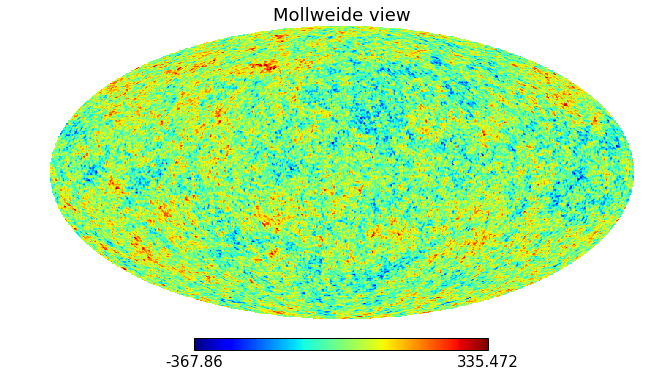

In [4]:
hp.mollview(testmap[0])

## first derivatives

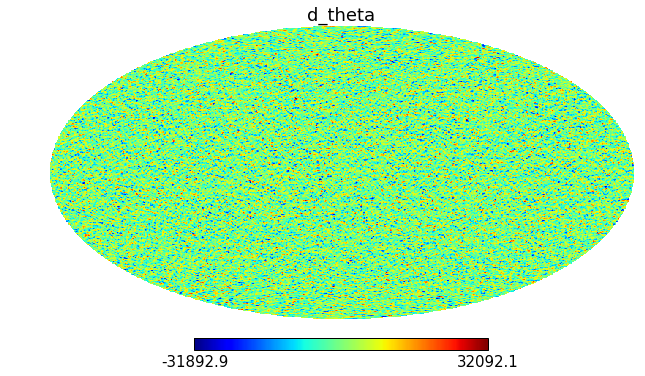

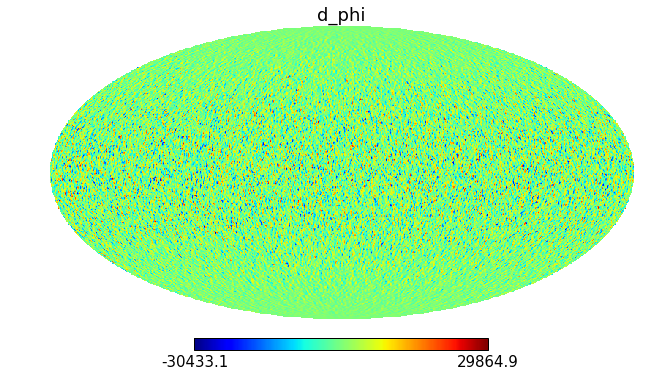

In [5]:
hp.mollview(d_theta, title='d_theta')
hp.mollview(d_phi,title='d_phi')

## second derivatives

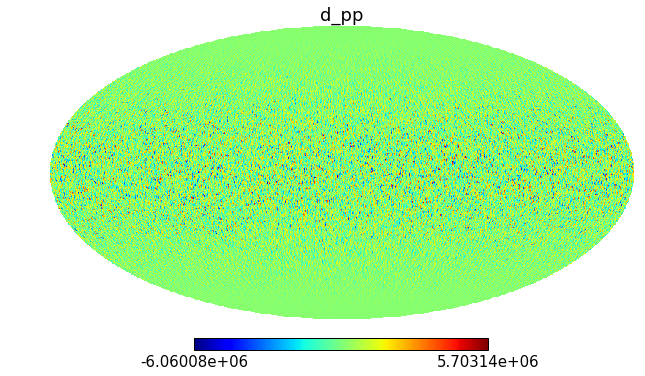

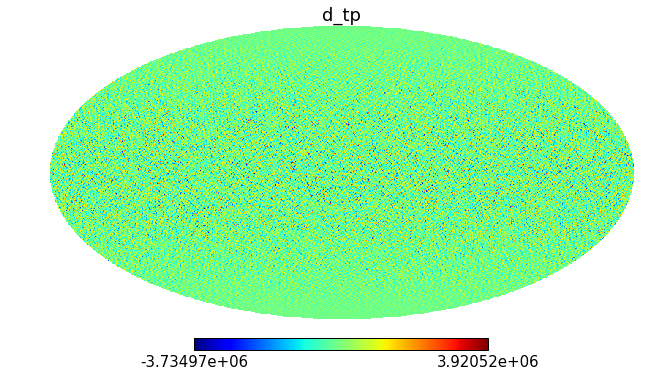

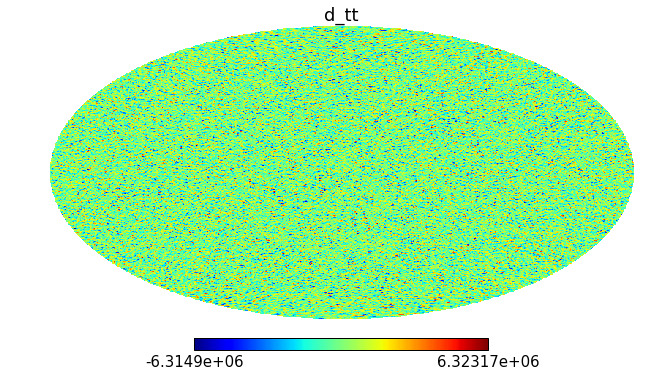

In [6]:
hp.mollview(dermap_pp, title='d_pp')
hp.mollview(dermap_tp,title='d_tp')
hp.mollview(dermap_tt,title='d_tt')

## verify that the derivative make sense
$
\begin{align}
\frac{\partial Y_{lm}}{\partial \phi} = im  Y_{lm}
\end{align}
$

$
\begin{align}
\frac{\partial Y_{lm}}{\partial \theta} = m \cot(\theta) Y_{lm} + \frac{\sqrt{\Gamma (l-m+1)} \sqrt{\Gamma(l+m+2)}}{\sqrt{\Gamma(l+m+1)}\Gamma(l-m)} e^{i \phi} Y_{l \; m+1}
\end{align}
$

Try to verify if the first relation is correct.

In [7]:
alm_t = hp.map2alm(d_phi)

In [8]:
Alm = hp.Alm()
lmax = Alm.getlmax(len(testalm[0]))
alm_t2 = np.array([1.j*alm*Alm.getlm(lmax,i)[1] for i, alm in enumerate(testalm[0])])

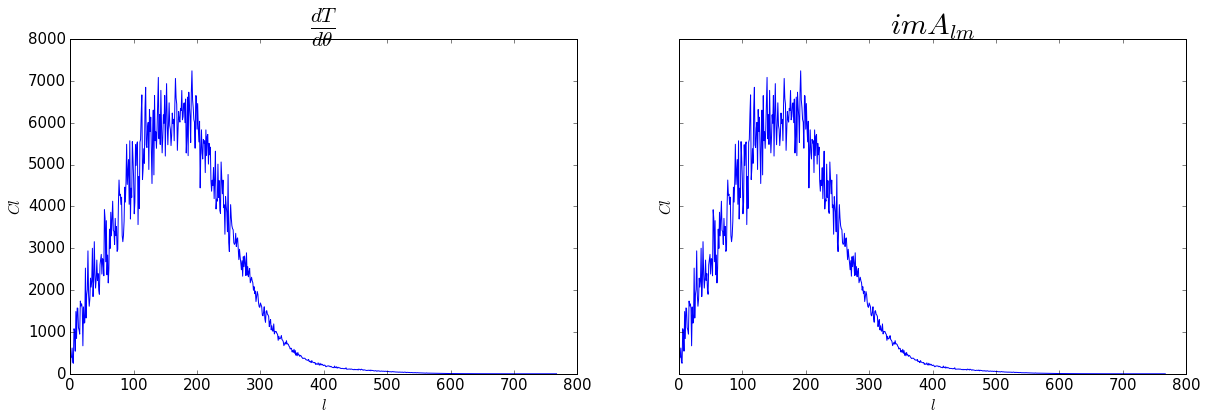

In [9]:
cl1 = hp.alm2cl(alm_t)
cl2 = hp.alm2cl(alm_t2)

f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (20,6))
ax1.plot(cl1, label = 'dT_dtheta')
ax2.plot(cl2, label = 'm A_lm')
ax1.set_title(r'$\frac{d T}{d \theta}$', fontsize = 30)
ax2.set_title(r'$im A_{lm}$', fontsize = 30)
ax1.set_xlabel(r'$l$')
ax2.set_xlabel(r'$l$')
ax1.set_ylabel(r'$Cl$')
ax2.set_ylabel(r'$Cl$')

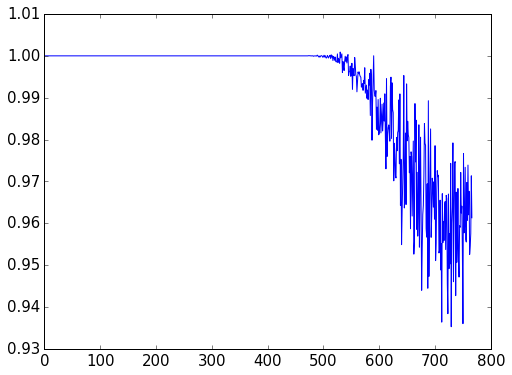

In [10]:
plt.plot(cl1[1:]/cl2[1:])

In [11]:
Alm.getidx(lmax,2,0)

2

In [12]:
alm_t[1000:1050]

array([-0.18339099 +1.64322066e-01j, -0.13788739 +1.33556285e-01j,
       -0.15826200 -4.99565488e-01j, -0.01884657 +1.33067600e-01j,
        0.24157794 -1.07769303e-01j, -0.57420657 -1.51064198e-01j,
        0.25431225 -5.11085265e-01j, -0.24198445 -5.06004867e-01j,
        0.15200836 -4.45227867e-01j,  0.33280382 -4.22378415e-01j,
       -0.02180808 -9.27894293e-02j, -0.06783767 +9.67494715e-03j,
        0.15364368 +8.19970082e-02j,  0.09508428 +1.04754070e-01j,
        0.01009038 +4.78279124e-04j,  0.12320150 -1.25280148e-01j,
        0.08704796 -4.79739492e-03j, -0.61488428 -3.22280228e-01j,
       -0.09579477 -2.17786760e-01j, -0.55412294 -4.92649426e-03j,
       -0.47486067 +2.20499889e-01j, -0.16767094 -2.85646052e-01j,
        0.36198626 -3.98328966e-03j, -0.04533526 +1.14475006e-01j,
        0.28158211 -3.04076400e-02j,  0.02033305 -3.15023265e-02j,
        0.21022657 -1.70949984e-01j, -0.26695595 +3.69136084e-02j,
        0.08050869 +1.73551404e-01j, -0.28457930 -2.56864945e-

In [13]:
alm_t2[1000:1050]

array([-0.18337626 +1.64268529e-01j, -0.13788008 +1.33582149e-01j,
       -0.15824720 -4.99619209e-01j, -0.01883894 +1.33093661e-01j,
        0.24159282 -1.07823200e-01j, -0.57419862 -1.51037944e-01j,
        0.25432719 -5.11139329e-01j, -0.24197618 -5.05978425e-01j,
        0.15202338 -4.45282088e-01j,  0.33281241 -4.22351789e-01j,
       -0.02179300 -9.28437991e-02j, -0.06782875 +9.70175339e-03j,
        0.15365882 +8.19424980e-02j,  0.09509351 +1.04781052e-01j,
        0.01010558 +4.23637088e-04j,  0.12321104 -1.25252994e-01j,
        0.08706322 -4.85216012e-03j, -0.61487443 -3.22252906e-01j,
       -0.09577945 -2.17841640e-01j, -0.55411277 -4.89900874e-03j,
       -0.47484530 +2.20444902e-01j, -0.16766046 -2.85618407e-01j,
        0.36200170 -4.03837533e-03j, -0.04532448 +1.14502806e-01j,
        0.28159760 -3.04628162e-02j,  0.02034414 -3.14743761e-02j,
        0.21024211 -1.71005243e-01j, -0.26694456 +3.69417048e-02j,
        0.08052428 +1.73496070e-01j, -0.28456761 -2.28626364e-